# IST256 Lesson 11
## Data Analysis


- Reading: Data Analysis with Pandas, Part II


## Links

- Participation: [https://poll.ist256.com](https://poll.ist256.com)  (Sign in with *netid*@syr.edu and your SU Password.)
- Class Chat: [https://chat.ist256.com](https://chat.ist256.com)  (Microsoft Teams.)


# Agenda

More Pandas:

- Iterations
- `json_normalize()`
- Web Scraping with `read_html()`
- `contact()` and `merge()`
- lambdas and `apply()`

# FEQT 1

#### Question: 

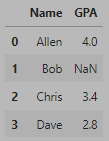

Which expression evaluates to 3.4?  

`A. df[2, 'GPA']`  
`B. df.loc[2,'GPA']`  
`C. df.iloc[2,'GPA']`  
`D. df[2]['GPA']`  

### Vote Now: [https://poll.ist256.com](https://poll.ist256.com)

# FEQT 2

#### Question: 

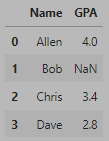

To get statistics on the 'GPA' column we write:

`A. df.describe()`  
`B. df.info()`  
`C. df.stats()`  
`D. df.statistics()`  

### Vote Now: [https://poll.ist256.com](https://poll.ist256.com)

# FEQT 3

#### Question: 

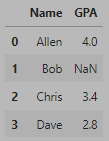

Which returns row with index 1?

`A. df[df['GPA'].isna()]`  
`B. df[df['GPA'] == np.nan]`  
`C. df[df['GPA'] == 'NaN']`  
`D. df[df['GPA'] is np.nan]`  

### Vote Now: [https://poll.ist256.com](https://poll.ist256.com)

## Looping over dataframes with `iterrows()`

- Similar to `dict.items()`, `DataFrame.iterrows()` uses `index`, `row` tuple.
- `index` is the dataframe index
- `row` is a `dict` of values where the column in the dataframe is the key
- Useful when you need to process the dataframe a row at a time, for example when plotting.


## `iterrows()` example


In [3]:
import pandas as pd
data = [ {"a" : 2, "b" : 5}, 
        {"a": 4, "b": 5}, 
        {"a": 2, "b": 10}]
df = pd.DataFrame(data)
for index, row in df.iterrows():
    print("index=", index, "row['a']=", row['a'])

index= 0 row['a']= 2
index= 1 row['a']= 4
index= 2 row['a']= 2


## Reading `JSON` into Pandas

- Two approaches `read_json()` and `json_normalize()`
- `read_json()` only works with list-like `JSON`
- `json_normalize()` much more flexible will flatten nested `JSON` but you must deserialize first.

## `json_normalize()` Syntax

```
import pandas as pd

df = pd.json_normalize(data, record_path="attribute",meta=["item"])
```

- `data` is a python `list` or `dict`
- `record_path` is optional, but sets the `JSON` key as the row-level in `df`
- `meta` is optional but sets the parent items to flatten


# Watch Me Code 1

### "orders.json" JSON Data Three ways

- `read_json()`
- `json_normalize()`
- `json_normalize()` with `record_path`


## Check Yourself: JSON

For the following:  
```
x = [ 
  {"a" : {"b": 1}, "c" : [10,11]},
  {"a" : {"b": 2}, "c" : [21,22,23]}
]
```
how many rows in `pd.json_normalize(x)`?

`A. 1`  
`B. 2`  
`C. 3`  
`D. 5`  

### Vote Now: [https://poll.ist256.com](https://poll.ist256.com)

## Check Yourself: JSON

For the following:  
```
x = [ 
  {"a" : {"b": 1}, "c" : [10,11]},
  {"a" : {"b": 2}, "c" : [21,22,23]}
]
```
how many columns in `pd.json_normalize(x)`?

`A. 1`  
`B. 2`  
`C. 3`  
`D. 5`  

### Vote Now: [https://poll.ist256.com](https://poll.ist256.com)

## Check Yourself: JSON

For the following:  
```
x = [ 
  {"a" : {"b": 1}, "c" : [10,11]},
  {"a" : {"b": 2}, "c" : [21,22,23]}
]
```
how many rows in `pd.json_normalize(x, record_path="c")`?

`A. 1`  
`B. 2`  
`C. 3`  
`D. 5`  

### Vote Now: [https://poll.ist256.com](https://poll.ist256.com)

## Check Yourself: JSON

For the following:  
```
x = [ 
  {"a" : {"b": 1}, "c" : [10,11]},
  {"a" : {"b": 2}, "c" : [21,22,23]}
]
```
how many columns in `pd.json_normalize(x, record_path="c")`?

`A. 1`  
`B. 2`  
`C. 3`  
`D. 5`  

### Vote Now: [https://poll.ist256.com](https://poll.ist256.com)

 ## Pandas `read_html()`
 
 - You can perform simple web scraping with `read_html()`
 - `read_html(url)` will find all HTML tables on the `url` and reutrn a list of dataframes
 - `read_html(url,storage_options=header)` to send in a custom user agent (required by some pages). 
 - use `len()` to find out how many tables were read from the `url`.


## Watch Me Code 2

- `read_html()` reads table data from a webpage!

Some examples: 

- `https://ist256.com` website - requires user agent
- `https://www.baseball-reference.com/leagues/MLB-standings.shtml`


## Combining Dataframes

- `pd.concat()` - Row-oriented. Append a list of dataframes into a single dataframe.   
Dataframes are the same: `Online Students + Campus Students`
- `pd.merge()` - Column-oriented. Combine one or more DataFrames based on a matching column.   
Dataframes are different but have a matching column. Example: `Customers <==> Orders`
    - `how=`
        - `"inner"` only matching columns
        - `"left"` only matching + all from left
        - `"right"` only matching + all from right        
        - `"outer"` all from left and right + matching

## Watch Me Code 3

- `concat()` sample use case. combine 4 months of orders into one dataframe.
- `merge()` sample use case. Who plays on which team?


## Generating Columns in Pandas

Engineering new columns in a common task in data analysis. We are making columns to help us tell a clear data story.

When you have complex logic / processing on the DataFrame that you need to store in a column:

- `def` a custom function with the row `dict` as input
- `return` the value 
- call the function with `apply()` using the inline `lambda: row` argument.


## Watch Me Code 4

- Read in credit cards: `https://raw.githubusercontent.com/mafudge/datasets/master/credit-cards/credit_cards.txt`
- `create a custom function()` issuer, similar to the  lesson 05 lab.
- `apply()` the`issuer()` function to each row to generate a new column `"issuer"`


# End-To-End Example

### Searching the UFO Dataset

- 5 months of UFO sightings in 2016: https://github.com/mafudge/datasets/tree/master/ufo-sightings
- Combine into a single data frame
- IPYWidgets + Interact to search the dataframe interactively.
- "C" level project - not many much data transformations happening hrre.


# Conclusion Activity : One Question Quiz

For the following dataframe, `df`

<table style="font-size:1.0em;">
    <thead><tr>
        <th>a</th>
        <th>b</th>
        <th>c</th>
    </tr></thead>
    <tbody>
    <tr>
        <td>1</td>
        <td>x</td>
        <td>y</td>
    </tr>
    <tr>
        <td>3</td>
        <td>w</td>
        <td>y</td>
    </tr>
    <tr>
        <td>5</td>
        <td>q</td>
        <td>z</td>
    </tr>
    </tbody>
</table>

what is: `df[ df['c'] =='z' ]['a']`   

A. `1`  
B. `3`  
C. `5`  
D. `a`  


### Vote Now: [https://poll.ist256.com](https://poll.ist256.com)